<a href="https://colab.research.google.com/github/amorabot/portfolio_data_science/blob/main/Analisando_os_Dados_do_Airbnb_Toronto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Toronto

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 14 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

<center><img alt="Toronto" width="30%" src="https://img.freepik.com/vetores-gratis/projeto-skyline-escuro-de-toronto_23-2147767851.jpg?w=826&t=st=1665452000~exp=1665452600~hmac=67166d7caa7f8c1f7c3020d525d31fda64997da91122bbc12add0d200add08c4"></center>

**Neste *notebook*, iremos analisar os dados referentes à Toronto, Canadá, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importando os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importando o arquivo listings.csv de Toronto para um DataFrame Pandas
df = pd.read_csv("http://data.insideairbnb.com/canada/on/toronto/2022-09-07/visualisations/listings.csv")  #o csv utilizado será referente aos dados coletados até o dia 7 de Setembro de 2022

## Análise dos Dados


**Dicionário das variáveis**

* `id` - Número que **representa um imóvel** específico no DataFrame
* `name` - **Nome do imóvel** 
* `host_id` - Número que **identifica um locador específico** no DataFrame
* `neighbourhood_group` -  ❌ Para *este* Dataset, é irrelevante, pois não possui valores válidos (diferentes de NaN)
* `neighbourhood` - **Bairro** que se encontra o imóvel
* `latitude` - **Coordenada geográfica** que indica a **latitude** do imóvel
* `longitude` - **Coordenada geográfica** que indica a **longitude** do imóvel
* `room_type` - **Tipo do imóvel** (Quarto único, apartamento inteiro, casa)
* `price` - **Preço** do aluguel do imóvel (em Dólares Canadenses)
* `minimum_nights` - **Quantidade mínima de noites** que se pode reservar o imóvel
* `number_of_reviews` - **Reviews recebidas** por aquele imóvel
* `last_review` - **Data da última review** recebida
* `reviews_per_month` - **Taxa mensal de reviews** recebidas ( reviews / meses_em_anuncio )
* `calculated_host_listings_count` - Número total de **anúncios feitos pelo anfitrião** daquele imóvel (segundo o Airbnb)
* `availability_365` - Quantidade de **dias disponíveis durante o ano**
* `number_of_reviews_ltm` - Número de **reviews feitas nos últimos 12 meses**
* `license` - **Número da licença** exigida para alguns imóveis

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas 
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,27640141,Fibre internet*Monthly Discount*Character House,2343887,Liora,NaN,Dovercourt-Wallace Emerson-Junction,43.66434,-79.42496,Entire home/apt,90,28,47,2022-06-13,0.95,2,145,4,NaN
1,27647117,Cozy studio in an amazing neighbourhood!,96809956,Alexandra,NaN,Playter Estates-Danforth,43.67943,-79.34853,Entire home/apt,45,28,4,2021-02-06,0.08,1,0,0,NaN
2,27826009,Downtown condo,17410774,Brianne,NaN,Waterfront Communities-The Island,43.64698,-79.39121,Entire home/apt,130,28,2,2018-09-09,0.04,1,0,0,NaN
3,27647509,Dundas west subway station apartment BEST LOCA...,179249078,Rosana,NaN,High Park North,43.65953,-79.45416,Private room,80,28,9,2019-03-20,0.19,1,0,0,NaN
4,27653375,Exquisite 1200 sqft 3BR + Den in core-downtown,135718015,Ayk,NaN,Waterfront Communities-The Island,43.64126,-79.38277,Entire home/apt,1999,28,20,2021-06-24,0.42,37,179,0,STR-2204-HLPVHK


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Prossigamos com a identificação de alguns pontos importantes do Dataset importado.

O Dataset que estamos analisando (`listings.csv`) é apenas uma versão **simplificada** de todos dados que o Airbnb registra, a versão mais completa e complexa também está disponível caso seja necessária (`listings.csv.gz`).

Assim, vejamos com **quantas variáveis** e registros estamos lidando, assim como os **tipos de cada variável** no Dataset:

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset

display(df.dtypes)

Entradas:	 16035
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

neighbourhood_group               1.000000
license                           0.595385
reviews_per_month                 0.211724
last_review                       0.211724
host_name                         0.000125
name                              0.000125
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

Os valores acima representam percentualmente (1 é 100%, 0 é 0%) quantos valores ausentes cada coluna tem:

  * Como dito anteriormente, a coluna `neighbourhood_group` possui todos os seus valores inválidos. 

  * Além disso, podemos ver, a priori, que aproximadamente 60% dos imóveis não necessitam de nenhuma licença para operar ou não declararam.

  * No mais, temos bons indicadores de um Dataset de qualidade, onde muitas colunas tem uma quantidade negligenciavel ou nula de valores inválidos.

### **Q3. Qual o tipo de distribuição das variáveis?** 

Usaremos um histograma para ver como as **variáveis numéricas** estão distribuídas:

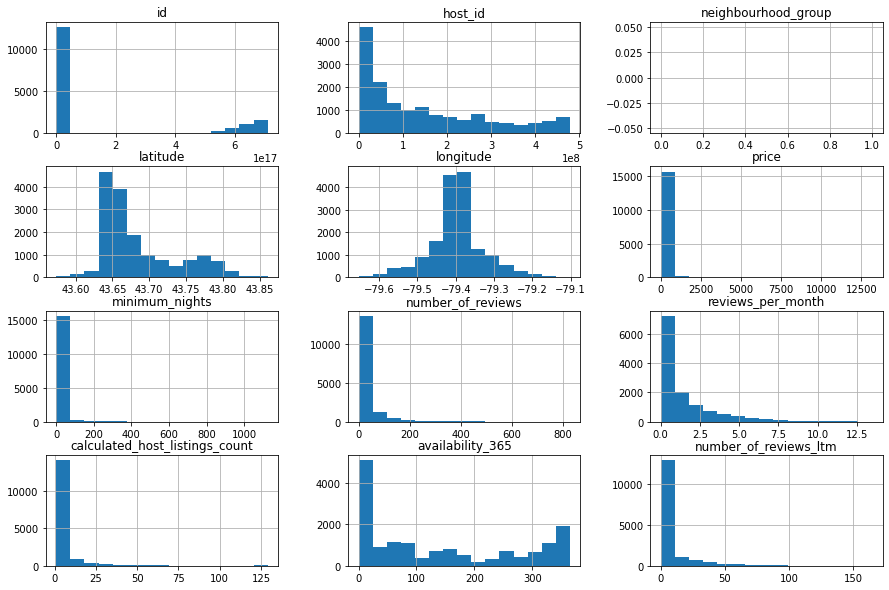

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

Podemos simples e diretamente extrair o valor da média e assumir que, a priori, esse valor obtido seria representativo.

Porém, como visto acima, em algumas colunas(`price` inclusa) existem indícios de ***outliers***, que podem distorcer um pouco essa medida. Vejamos um breve resumo de algumas medidas *estatísticas* da coluna `price`:

In [ ]:
# visualização de medidas estatísticas da coluna price
df.price.describe()

count    16035.000000
mean       205.232679
std        349.268699
min          0.000000
25%         80.000000
50%        130.000000
75%        226.000000
max      13164.000000
Name: price, dtype: float64

Com as visualizações do histograma anteriormente apresentado e com a ajuda dos seguintes dados:


*   `std` - **Desvio Padrão**: Indica o quão dispersos estão os dados, expressa se os valores são muito diferentes entre si
*   `min` - **Valor mínimo** registrado
*   `max` - **Valor máximo** registrado
*   `mean` - **Média** (Valor desejado a priori)
*   `50%` - Valor da **mediana**

Podemos ver que existem dados extremamente distoantes da mediana e que essa amostra possui um *alto desvio padrão* (sinal de valores muito diferentes entre si).

Apesar da média poder ter sido normalizada por valores extremos se balanceando (imóveis sem preço de aluguel e imóveis 10 vezes mais caros que a mediana, por exemplo), *não podemos ter certeza de que essa valor é representativo*. Portanto, é interessante limparmos esses poucos dados extremos dessa coluna para obtermos resultados mais condizentes com a realidade.

#### Limpando valores

Os mesmos **indícios** apresentados pela coluna `price` aparecem também na coluna `minimum_nights`. Portanto, iremos dar um tratamento similar às duas e polir um pouco os dados nelas presentes

In [3]:
df_clean = df.copy() # fazendo a clonagem do DataFrame inicial para podermos operar sobre o novo Dataframe sem outliers daqui pra frente

In [4]:
df_clean.drop(["neighbourhood_group"], axis=1, inplace=True)   # eliminando a coluna `neighbourhood_group`, visto que não tem serventia nesse caso

In [5]:
#limpando entradas incoerentes (Imóveis sem nome/ Sem proprietários atrelados)

df_clean = df_clean.dropna(subset=['name'], axis=0)        # eliminando todas as entradas que não tem o nome imóvel
df_clean = df_clean.dropna(subset=['host_name'], axis=0)   # eliminando todas as entradas que não possuem o nome do proprietário

In [6]:
# limpando os valores de `price`

outlSuperiores = df_clean[df_clean.price > 1200].index    # contém os índices de todos os imóveis que ultrapassam o limiar de 1200 dólares
outlInferiores = df_clean[df_clean.price == 0].index      # contém os ínices dos imóveis sem preço 

df_clean.drop(outlSuperiores, axis=0, inplace = True)   # limpando as entradas que tem o preço maior que 1200 dólares
df_clean.drop(outlInferiores, axis=0, inplace = True)   # limpando as entradas que possuem preço nulo (ou abaixo de um limiar inferior definido, se houvesse)


In [7]:
#limpando os valores de `minimum_nights`

outlNoites = df_clean[df_clean.minimum_nights > 365].index    # contém os índices das entries em `minimum_nights` que tem valores maiores que 365 (1 ano)

print("Entradas antes: {}".format(df.shape[0]))
df_clean.drop(outlNoites, axis=0, inplace = True)   # limpando o Dataset das entradas de imóveis que exigem mais de 1 ano de duração mínima do aluguel
print("Entradas depois: {}".format(df_clean.shape[0]))
print("-----------------------")
print("Uma diferença de apenas {:.3f}% na quantidade de valores para conseguir um Dataset mais consistente!".format((1 - (df_clean.shape[0] / df.shape[0]))*100))


Entradas antes: 16035
Entradas depois: 15872
-----------------------
Uma diferença de apenas 1.017% na quantidade de valores para conseguir um Dataset mais consistente!


#### Novas Visualizações e Valor final da média

Vamos prossseguir com a visualização da distribuição das variáveis numéricas do Dataset, agora limpo, e então obter o valor da média de preços dos imóveis de Toronto.

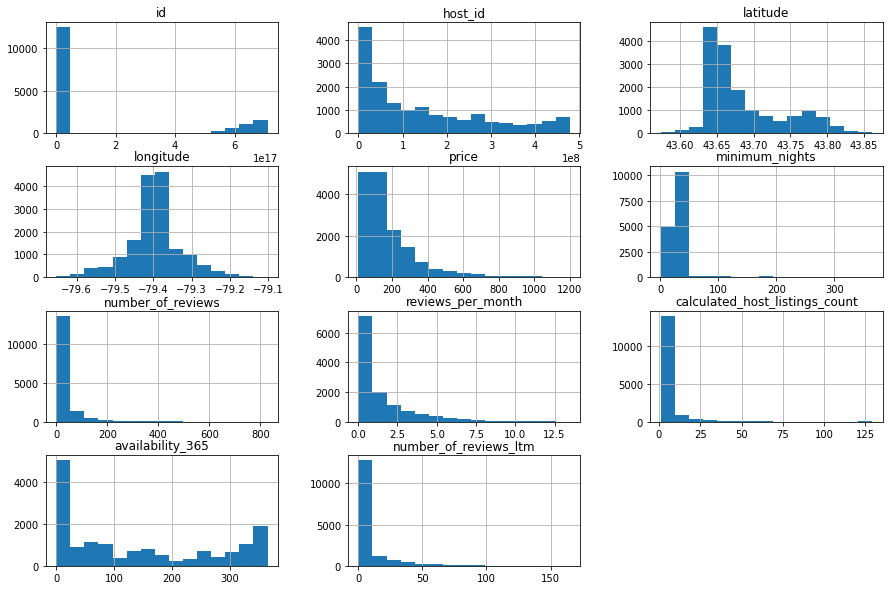

In [ ]:
df_clean.hist(bins=15, figsize=(15,10));

Agora é possível ter uma clareza muito maior na visualização das distribuições de `price` e `minimum_nights`, além de termos nos livrado da coluna `neighbourhood_group`, que não teria nenhum propósito previamente.

In [9]:
# vejamos, por fim o preço médio dos alugéis

print("Média antes da limpeza de outliers: {:.2f} ($CAD)".format(df.price.mean()))
print("---------------------------------------------")
print("Média após a limpeza de outliers: {:.2f} ($CAD)".format(df_clean.price.mean()))

Média antes da limpeza de outliers: 205.23 ($CAD)
---------------------------------------------
Média após a limpeza de outliers: 183.96 ($CAD)


### **Q4. Qual a correlação existente entre as variáveis**

É interessante averiguarmos se há uma correlação forte entre variáveis, uma vez que muitas informações valiosas podem ser extraídas ao analisá-las em conjunto e não como fragmentos independentes.

Essa visão mais holística promove uma observação mais rica e pode facilitar insights! Dito isto, vejamos algumas visualizações das correlações:

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.128075,0.020048,0.188927,0.128776,0.111750
minimum_nights,-0.128075,1.000000,-0.125580,-0.305963,0.000432,0.003184
number_of_reviews,0.020048,-0.125580,1.000000,0.441616,-0.070210,-0.034498
reviews_per_month,0.188927,-0.305963,0.441616,1.000000,-0.050299,0.093917
calculated_host_listings_count,0.128776,0.000432,-0.070210,-0.050299,1.000000,0.075185
availability_365,0.111750,0.003184,-0.034498,0.093917,0.075185,1.000000


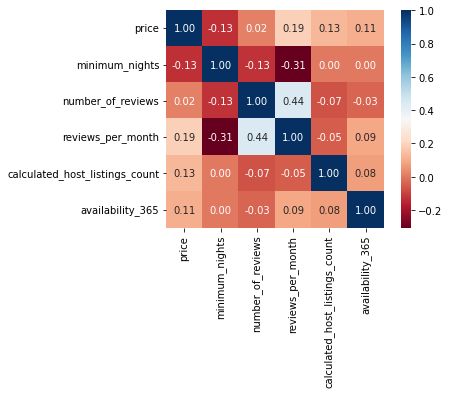

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    10790
Private room        4932
Shared room          147
Hotel room             3
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.679814
Private room       0.310736
Shared room        0.009262
Hotel room         0.000189
Name: room_type, dtype: float64

Vendo de forma percentual, podemos perceber que **apartamentos e casas** são bem mais competitivos que as demais opções, totalizando quase **dois terços** de todos os registros. 

Também podemos ver que, se há de fato uma boa infraestrutura de hotéis dedicados na cidade de Toronto, os clientes da Airbrb, sejam inquilinos ou sejam proprietários, parecem não usar a plataforma para procurar ou anunciar quartos desse tipo.

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
grupoVizinhancas = df_clean.groupby(["neighbourhood"]) #fazendo o agrupamento de imóveis da mesma vizinhança

mediaVizinhancas = grupoVizinhancas.price.mean() #fazendo a média para cada vizinhança

mediaVizinhancas.sort_values(ascending=False)[:10] #mostrando os 10 maiores valores de forma decrescente

neighbourhood
Bridle Path-Sunnybrook-York Mills    333.727273
Waterfront Communities-The Island    297.829403
Lawrence Park South                  245.163265
Edenbridge-Humber Valley             238.875000
Niagara                              237.108514
Bay Street Corridor                  234.024510
Rosedale-Moore Park                  231.373134
Beechborough-Greenbrook              230.444444
Annex                                224.721545
South Riverdale                      215.517799
Name: price, dtype: float64

#### Números mais altos implicam, necessariamente, bairros mais caros?

Vamos ver se, por exemplo, as 5 primeiras entradas da lista acima são realmente representativas(podem ter uma amostra muito pequena para retratar a realidade):

In [ ]:
#mostrar as 5 primeiras vizinhanças e quantos imóveis estão registrados nelas

print("Bridle Path-Sunnybrook-York Mills: " + str(df_clean[df_clean.neighbourhood == "Bridle Path-Sunnybrook-York Mills"].shape[0]) + " imóveis")

print("Waterfront Communities-The Island: " + str(df_clean[df_clean.neighbourhood == "Waterfront Communities-The Island"].shape[0]) + " imóveis")

print("Lawrence Park South: " + str(df_clean[df_clean.neighbourhood == "Lawrence Park South"].shape[0]) + " imóveis")

print("Niagara: " + str(df_clean[df_clean.neighbourhood == "Niagara"].shape[0]) + " imóveis")

print("Bay Street Corridor: " + str(df_clean[df_clean.neighbourhood == "Bay Street Corridor"].shape[0]) + " imóveis")

Bridle Path-Sunnybrook-York Mills: 11 imóveis
Waterfront Communities-The Island: 2714 imóveis
Lawrence Park South: 49 imóveis
Niagara: 599 imóveis
Bay Street Corridor: 408 imóveis


#### Amostras Pequenas

Aparentemente os bairros `Bridle Path-Sunnybrook-York Mills` e `Lawrence Park South` possuem médias bem altas mas uma amostra bem pequena de imóveis, se compararmos com outros bairros.

Isso nos dá um apenas **indicador**, (que pode estar bem distocido) mas não a certeza de que esses bairros são sinônimos de imóveis mais caros.

Vejamos de forma não ordenada os preços dos (10 primeiros) imóveis nesses bairos para termos uma noção:

In [ ]:
# visualizando os preços de Bridle Path-Sunnybrook-York Mills
df_clean[df_clean.neighbourhood == "Bridle Path-Sunnybrook-York Mills"].price[:10]

575       76
3307     404
4642      99
7493     300
8593     125
9485     625
9758     312
10093    240
11827    499
12429    942
Name: price, dtype: int64

In [ ]:
# visualizando os preços de Lawrence Park South
df_clean[df_clean.neighbourhood == "Lawrence Park South"].price[:10]

39       75
373     600
693     150
774     295
828      94
833     600
851     500
944     115
1036    132
1171    750
Name: price, dtype: int64

In [ ]:
# mediana dos preços (ordenados) dos 2 bairros acima
print("Mediana de Bridle Path-Sunnybrook-York Mills: " + str(df_clean[df_clean.neighbourhood == "Bridle Path-Sunnybrook-York Mills"].price.sort_values(ascending=False).median()))
print("Mediana de Lawrence Park South: " + str(df_clean[df_clean.neighbourhood == "Lawrence Park South"].price.sort_values(ascending=False).median()))

Mediana de Bridle Path-Sunnybrook-York Mills: 300.0
Mediana de Lawrence Park South: 150.0


Em ambos os bairros podemos facilmente encontrar vários imóveis bem mais acessíveis que a média, mas especialmente em `Lawrence Park` os indicadores são de uma média um pouco inconsistente com a realidade (mais afetada por poucos valores bem maiores que a média)


---

#### Waterfront Communities-The Island (!?)

Por fim, podemos dizer que a priori que `Bridle Path-Sunnybrook-York Mills` seria o bairro mais caro da cidade. Mas investigando um pouco mais a fundo, é mais prudente dizer que `Waterfront Communities-The Island` seria o bairro que melhor se encaixa nesse perfil, devido a seus preços consistentemente mais altos (graças a uma amostra mais representativa).

Por mais que `Bridle Path` tenha alguns indicadores de que é o 1º lugar, devido à quantidade bastante pequena de imóveis registrados, se torna arriscado assumir isso sem um contexto maior.

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [11]:
# ver a média da coluna `minimum_nights`
print("{:.1f} noites".format(df_clean.minimum_nights.mean()))

24.6 noites


#### Que tal vermos um mapa de Toronto?

Agora que pudermos responder várias perguntas sobre os imóveis de Toronto (os quais temos as coordenadas!), vamos dar uma olhada como eles estão distribuidos ao redor da cidade:

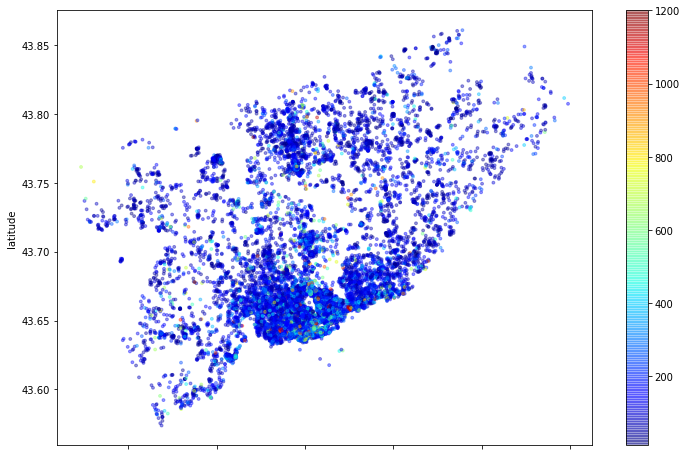

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

<center><img alt="Conclusão Toronto" width="50%" src="https://img.freepik.com/vetores-gratis/homem-acenando-cena-de-personagem-de-bandeira-do-canada_603843-2550.jpg?w=996&t=st=1665451605~exp=1665452205~hmac=94da15f9a1fc1782ac321b63edf2dbade42b33ae1b201bbc81c67e1c80e18de6"></center>

Por fim, pudemos analisar uma quantidade modesta de imóveis de Toronto, mas ainda de forma bem superficial, considerando que o arquivo utilizado se trata apenas de uma versão resumida/simplificada dos registros (como mencionado em Q1.).

Apesar de tudo, foi possível verificar indícios de outliers e tratá-los, foi possível ver que, no geral, usuários da Airbnb em Toronto costumam preferir casas e apartamentos para alugar e também foi possível ver quais são os bairros mais caros da cidade.

Com isso encerramos a análise desse Dataset, que, por mais que esteja bastante consistente em termos de completude dos dados, ainda possui muitas entradas inúteis, inválidas ou extremas que devem ser tratadas para termos um melhor retrato da realidade.